# Gradients 

An image gradient is a directional change in the intensity or color in an image. <br>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

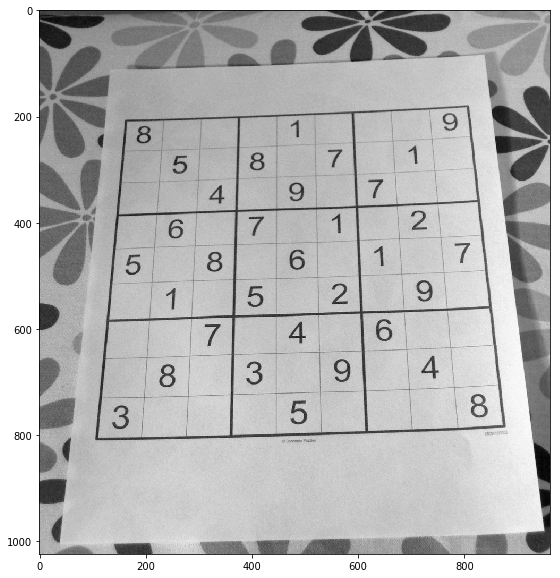

In [3]:
img = cv2.imread('DATA/sudoku.jpg',0)
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
display_img(img)

## Sobel Gradient 

The Sobel operator performs a 2-D spatial gradient measurement on an image.


Gx = \begin{bmatrix}
-1 & 0 & +1\\ 
 -2& 0 & +2\\ 
 -1& 0 & +1
\end{bmatrix}
Gy =\begin{bmatrix}
-1 & -2 & -1\\ 
 0& 0 & 0\\ 
 +1& +2 & +1
\end{bmatrix}

In [4]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

(<matplotlib.axes._subplots.AxesSubplot at 0x192a66535f8>,
 Text(0.5, 1.0, 'sobely'))

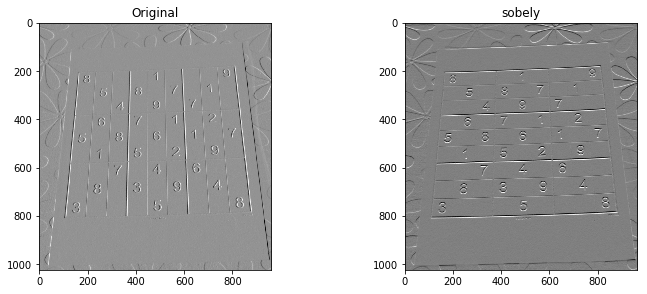

In [5]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1),plt.imshow(sobelx,cmap = 'gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(sobely,cmap = 'gray'),plt.title('sobely')

## Blending Sobels



In [6]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

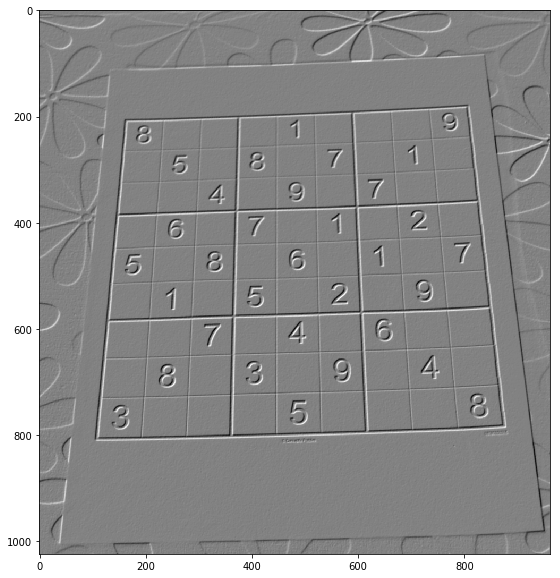

In [7]:
display_img(blended)

(<matplotlib.axes._subplots.AxesSubplot at 0x192a6493c50>,
 Text(0.5, 1.0, 'Binary Inverse'))

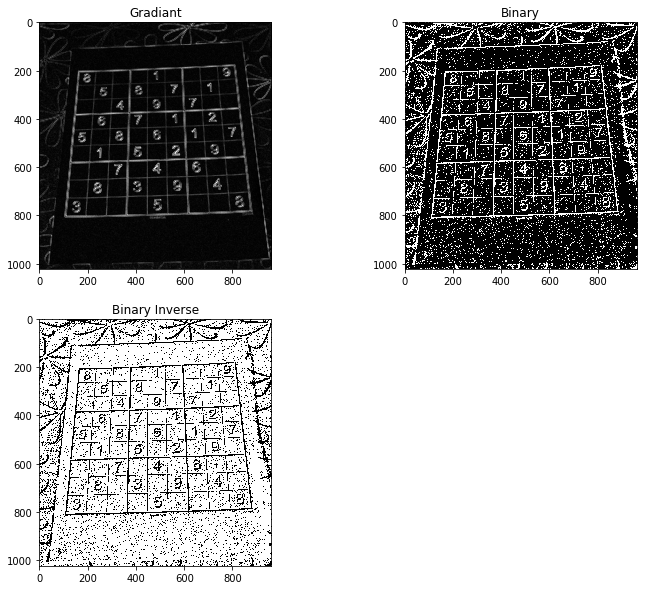

In [8]:
kernel = np.ones((4,4),np.uint8)
fig = plt.figure(figsize=(12,10))
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
plt.subplot(2,2,1),plt.imshow(gradient,cmap = 'gray'),plt.title('Gradiant')
plt.subplot(2,2,2),plt.imshow(th1,cmap = 'gray'),plt.title('Binary')
plt.subplot(2,2,3),plt.imshow(th2,cmap = 'gray'),plt.title('Binary Inverse')

## Laplacian Derivatives

 The Laplacian of an image highlights regions of rapid intensity change and is therefore often. used for edge detection
 
 The Laplacian is often applied to an image that has first been smoothed with something approximating a Gaussian smoothing filter in order to reduce its sensitivity to noise.

Common Laplacian = \begin{bmatrix}
  0 & -1 & 0\\ 
 -1& 4 & -1\\ 
 0& -1 & 0
\end{bmatrix}

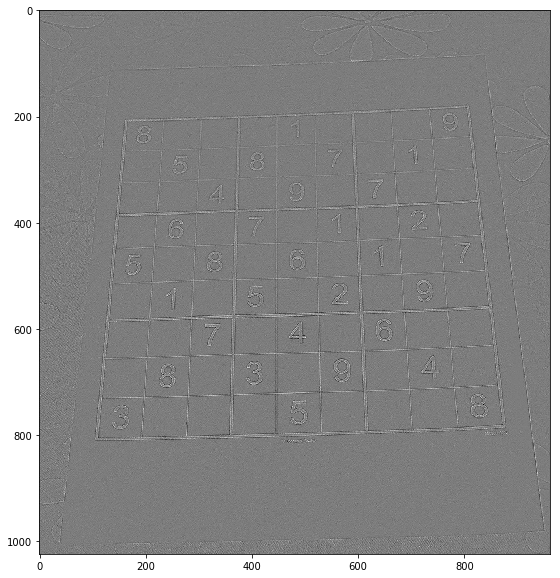

In [9]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
display_img(laplacian)

---

---


# Image Histogram

Image histograms shows frequency of pixels intensity values. In an image histogram, the x axis shows the gray(R,G,B) level intensities and the y axis shows the frequency of these intensities.

In [10]:
dark_horse = cv2.imread('DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

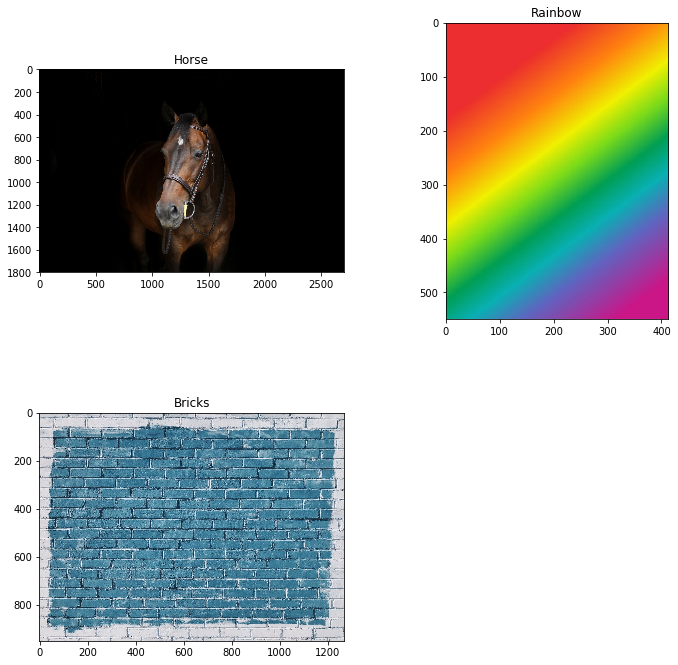

In [12]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1),plt.imshow(show_horse),plt.title('Horse')
plt.subplot(2,2,2),plt.imshow(show_rainbow),plt.title('Rainbow')
plt.subplot(2,2,3),plt.imshow(show_bricks),plt.title('Bricks')
plt.show()


### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

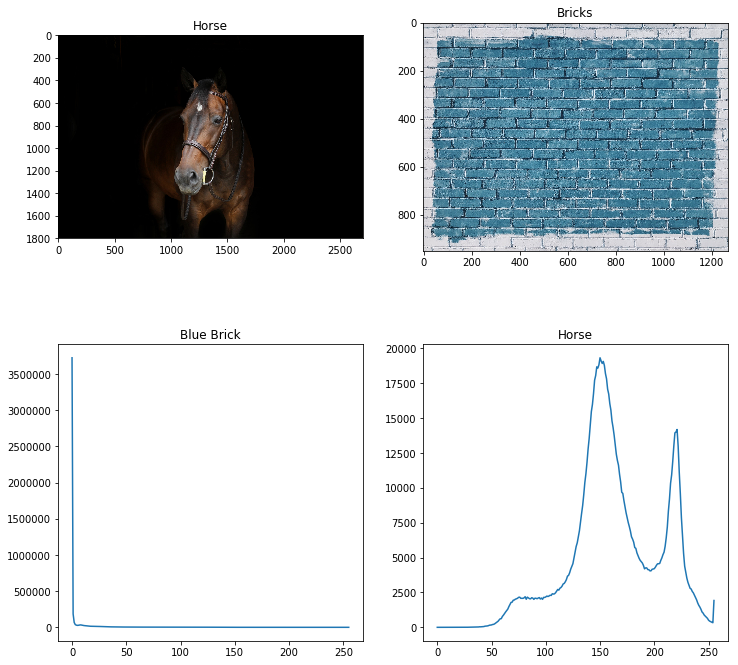

In [13]:
fig = plt.figure(figsize=(12,12))
hist_values_blue = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values_dark = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

# Channel 0 = blue

plt.subplot(2,2,1),plt.imshow(show_horse),plt.title('Horse')
plt.subplot(2,2,2),plt.imshow(show_bricks),plt.title('Bricks')
plt.subplot(2,2,3),plt.plot(hist_values_dark),plt.title('Blue Brick')
plt.subplot(2,2,4),plt.plot(hist_values_blue),plt.title('Horse')

plt.show()

## Plotting 3 Color Histograms

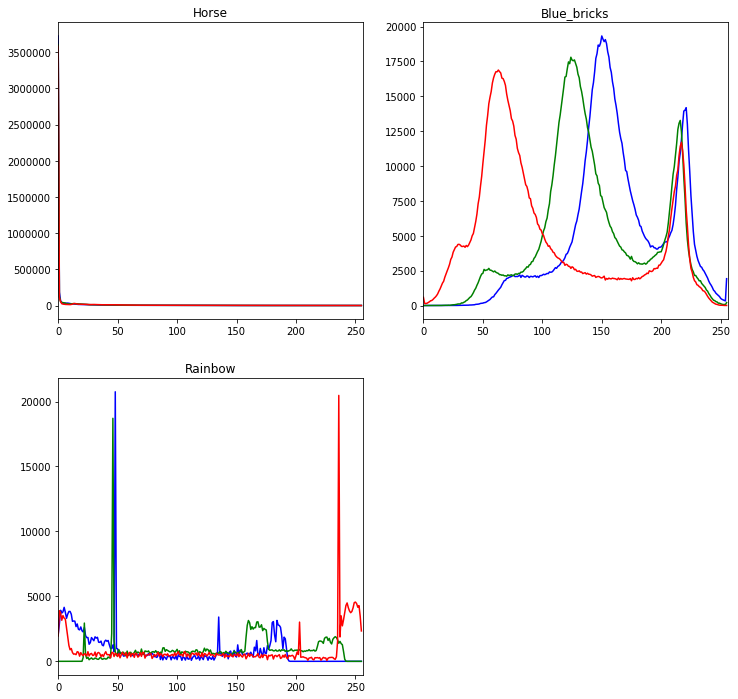

In [24]:
img = dark_horse
fig = plt.figure(figsize=(12,12))
im = [dark_horse,blue_bricks,rainbow]
im_name = ['Horse','Blue_bricks','Rainbow']
n=1
color = ('b','g','r')
for t in im:
    plt.subplot(2,2,n)
    
    for i,col in enumerate(color):
        histr = cv2.calcHist([t],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.title(im_name[n-1])
    n+=1
plt.show()

---

---

# Histogram Equalization

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.

### For Grayscale

In [14]:
gorilla = cv2.imread('DATA/gorilla.jpg',0)
hist_values_normal = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [15]:
eq_gorilla = cv2.equalizeHist(gorilla)
hist_values_eq = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

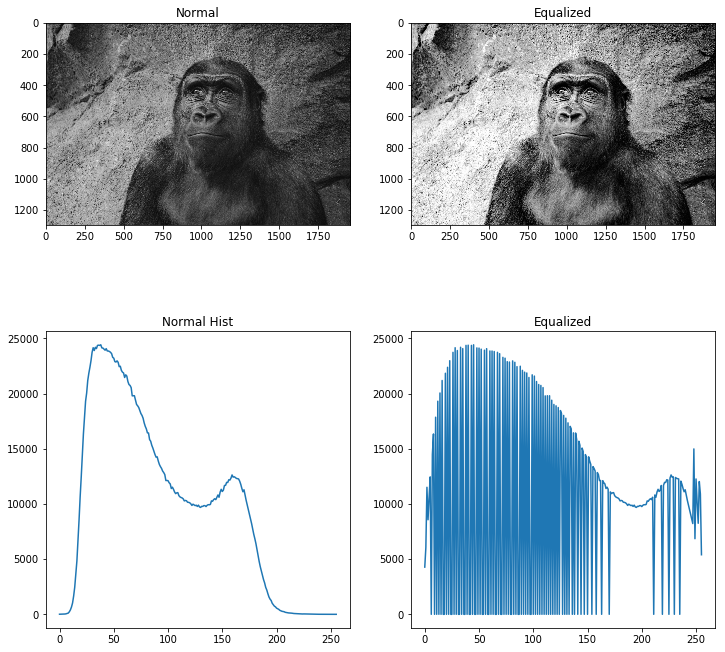

In [16]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1),plt.imshow(gorilla,cmap='gray'),plt.title('Normal')
plt.subplot(2,2,2),plt.imshow(eq_gorilla,cmap='gray'),plt.title('Equalized')
plt.subplot(2,2,3),plt.plot(hist_values_normal),plt.title('Normal Hist')
plt.subplot(2,2,4),plt.plot(hist_values_eq),plt.title('Equalized')
plt.show()

## For Color

In [17]:
color_gorilla = cv2.imread('DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)


In [18]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
hi1 = cv2.calcHist([color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hi2 = cv2.calcHist([eq_color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])

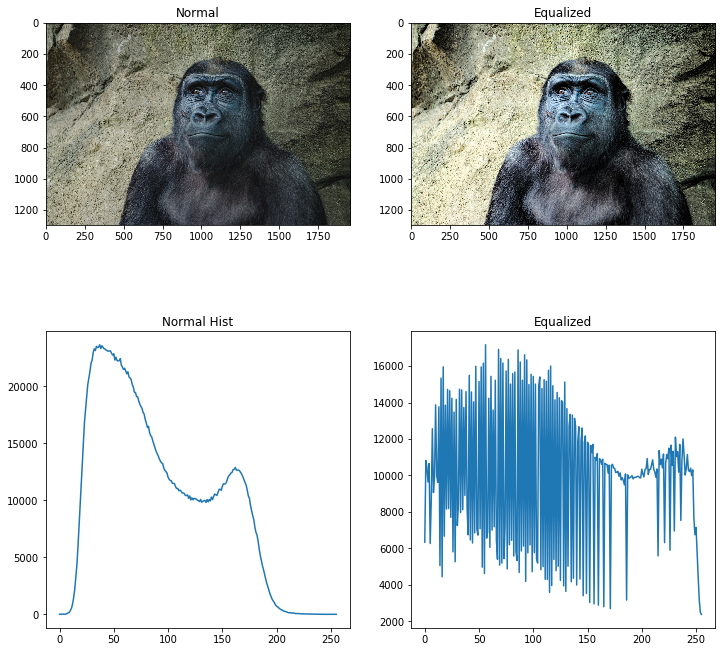

In [22]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1),plt.imshow(show_gorilla),plt.title('Normal')
plt.subplot(2,2,2),plt.imshow(eq_color_gorilla),plt.title('Equalized')
plt.subplot(2,2,3),plt.plot(hi1),plt.title('Normal Hist')
plt.subplot(2,2,4),plt.plot(hi2),plt.title('Equalized')
plt.show()

http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html